Лабораторная работа 3. 
Метрические методы классификации

In [70]:
import pandas as pd
import numpy as np

data_source = "../MMO/Datasets/penguins_lab3.csv"
d = pd.read_table(data_source, delimiter=',')
d.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
0,39.1,18.7,181,3750,Adelie
1,39.5,17.4,186,3800,Adelie
2,40.3,18.0,195,3250,Adelie
3,36.7,19.3,193,3450,Adelie
4,39.3,20.6,190,3650,Adelie


In [50]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     333 non-null    float64
 1   bill_depth_mm      333 non-null    float64
 2   flipper_length_mm  333 non-null    int64  
 3   body_mass_g        333 non-null    int64  
 4   species            333 non-null    object 
dtypes: float64(2), int64(2), object(1)
memory usage: 13.1+ KB


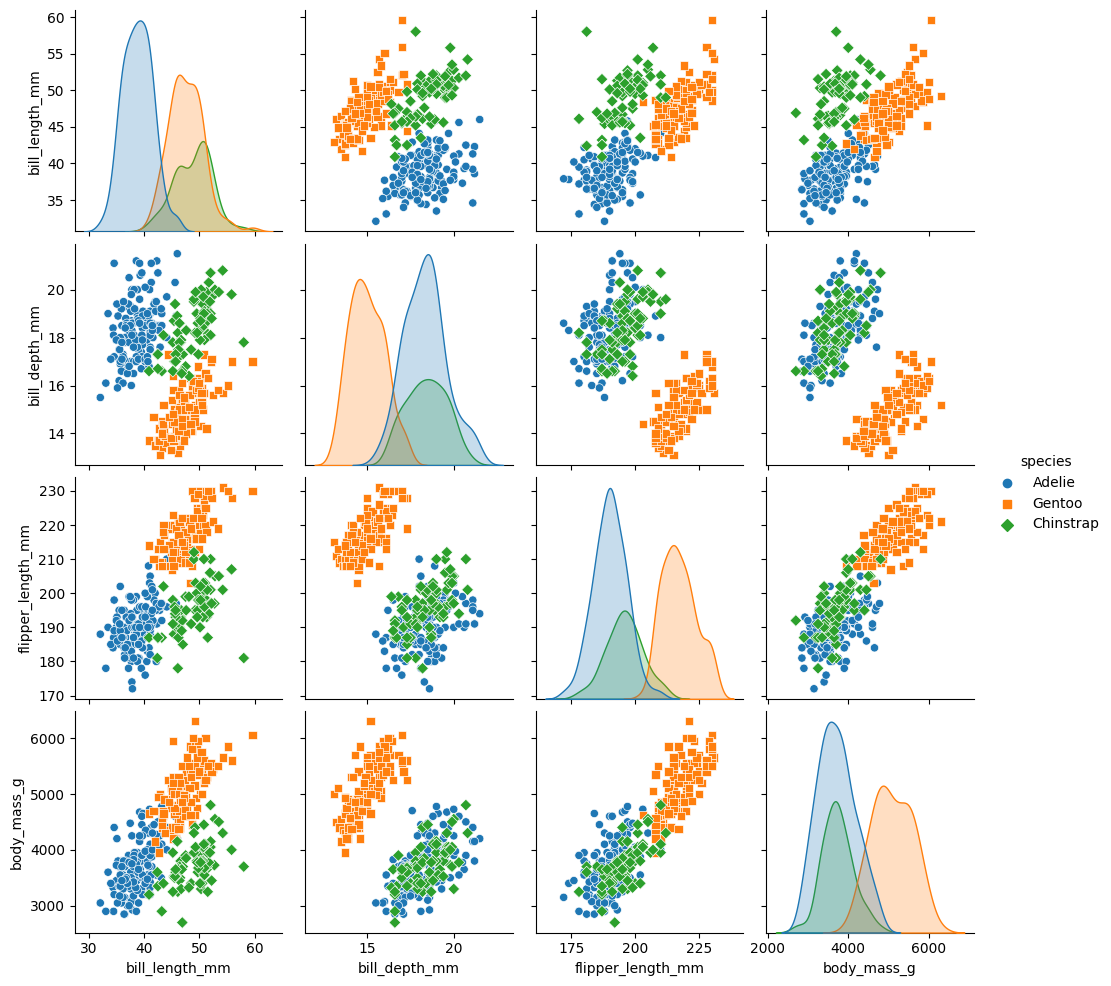

In [52]:
import seaborn as sb
%matplotlib inline
sb.pairplot(d, hue='species', markers=["o", "s", "D"])

In [53]:
from sklearn.neighbors import KNeighborsClassifier

X_train = d[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y_train = d['species']

K = 3

# Создание и настройка классификатора
knn = KNeighborsClassifier(n_neighbors=K)
# построение модели классификатора (процедура обучения)
knn.fit(X_train, y_train)

# Использование классификатора
# Объявление признаков объекта
X_test = np.array([[1.2, 1.0, 2.8, 1.2]])
# Получение ответа для нового объекта
target = knn.predict(X_test)
print(target)

['Adelie']


c:\Users\Daniil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_holdout, y_train, y_holdout = \
            train_test_split(d.iloc[ :, 0:4 ], 
                             d['species'], 
                             test_size=0.3, 
                             random_state=17)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_holdout)
accur = accuracy_score(y_holdout, knn_pred)
print('accuracy: ', accur)

accuracy:  0.79


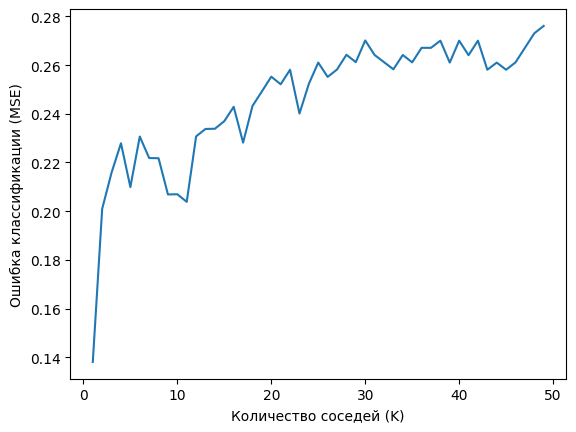

Оптимальные значения K:  [1]


In [64]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Значения параметра K
k_list = list(range(1,50))
# Пустой список для хранения значений точности
cv_scores = []
# В цикле проходим все значения K
for K in k_list:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, d.iloc[ : , 0:4 ], d['species'], cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Вычисляем ошибку (misclassification error)
MSE = [1-x for x in cv_scores]

# Строим график
plt.plot(k_list, MSE)
plt.xlabel('Количество соседей (K)');
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

# Ищем минимум
k_min = min(MSE)

# Пробуем найти прочие минимумы (если их несколько)
all_k_min = []
for i in range(len(MSE)):
    if MSE[i] <= k_min:
        all_k_min.append(k_list[i])

# печатаем все K, оптимальные для модели
print('Оптимальные значения K: ', all_k_min)

c:\Users\Daniil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Daniil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Daniil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Daniil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Daniil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid fe

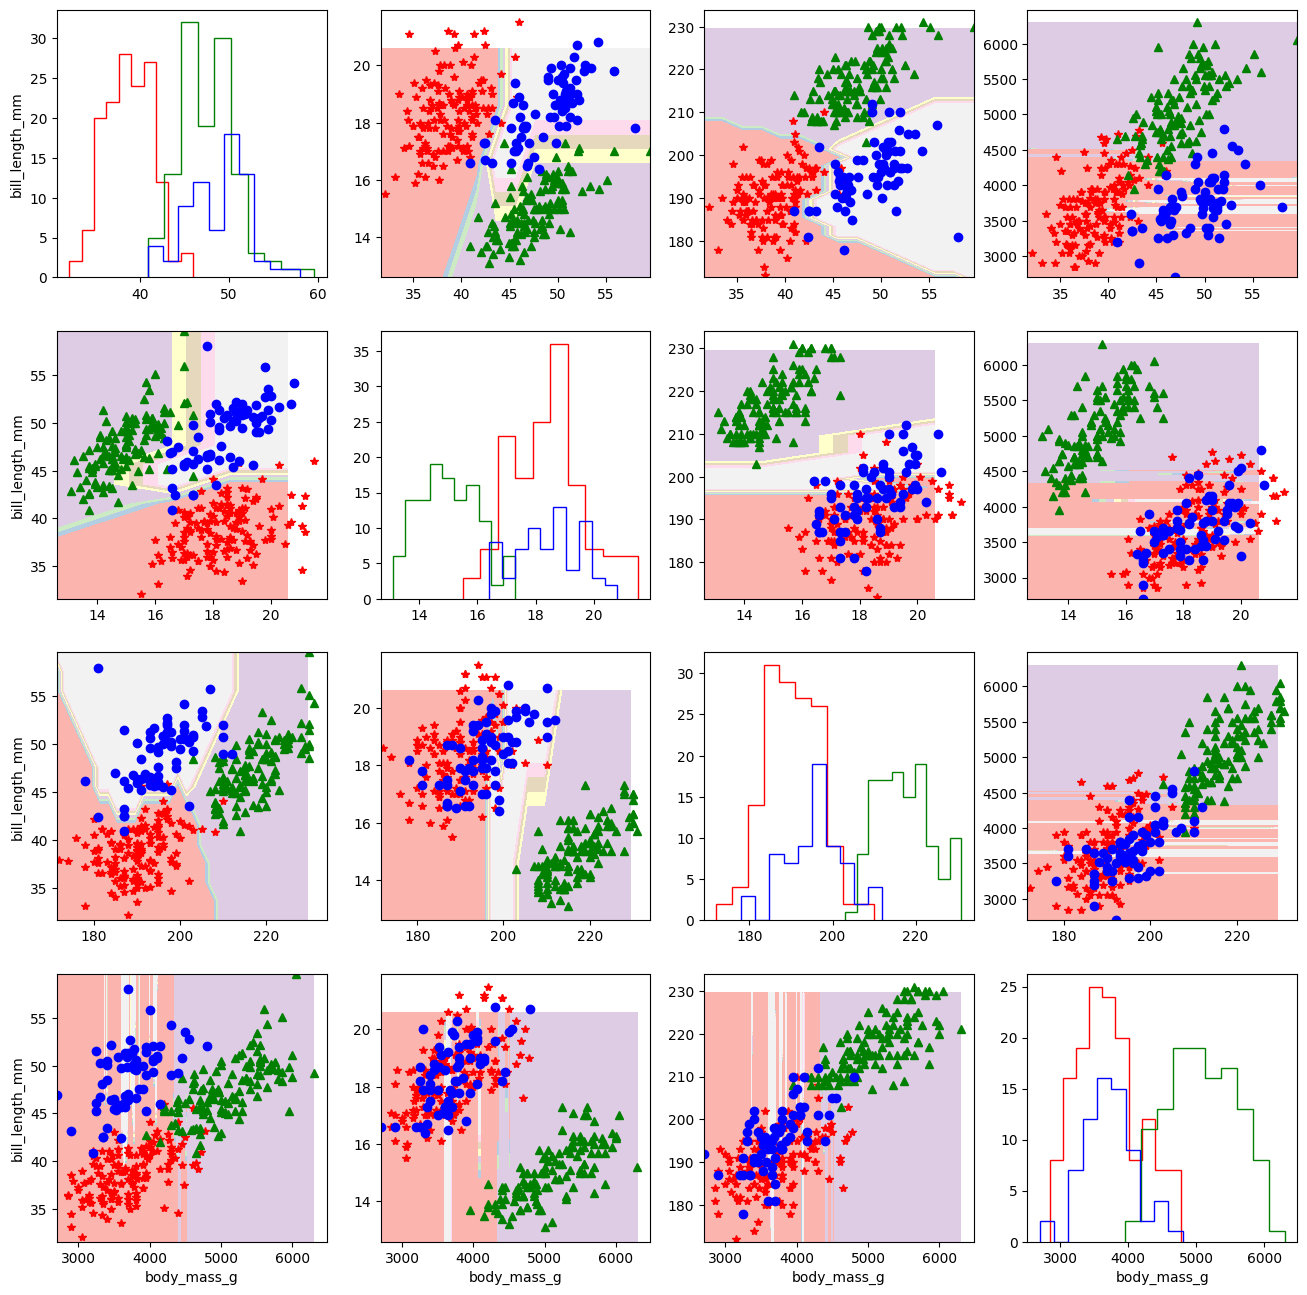

In [69]:
dX = d.iloc[:,0:4]
dy = d['species']

plot_markers = ['r*', 'g^', 'bo']
species = dy.unique()

# Создаем подграфики для каждой пары признаков
f, places = plt.subplots(4, 4, figsize=(16,16))

fmin = dX.min()-0.5
fmax = dX.max()+0.5
plot_step = 2

# Обходим все subplot
for i in range(0,4):
    for j in range(0,4):

        # Строим решающие границы 
        if(i != j):
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
                               np.arange(fmin[j], fmax[j], plot_step))
            model = KNeighborsClassifier(n_neighbors=13)
            model.fit(dX.iloc[:, [i,j]], dy)
            p = model.predict(np.c_[xx.ravel(), yy.ravel()])
            p = p.reshape(xx.shape)
            p[p==species[0]] = 0
            p[p==species[1]] = 1
            p[p==species[2]] = 2
            places[i,j].contourf(xx, yy, p, cmap='Pastel1') 
      
        # Обход всех классов
        for id_species in range(len(species)):
            idx = np.where(dy == species[id_species])
            if i==j:
                places[i, j].hist(dX.iloc[idx].iloc[:,i],
                                  color=plot_markers[id_species][0],
                                 histtype = 'step')
            else:
                places[i, j].plot(dX.iloc[idx].iloc[:,i], dX.iloc[idx].iloc[:,j], 
                                  plot_markers[id_species], 
                                  label=species[id_species], markersize=6)
        
        if j==0:
            places[i, j].set_ylabel(dX.columns[j])
        
        if i==3:
            places[i, j].set_xlabel(dX.columns[i])